# 11. Further Issues in Using OLS with Time Series Data

## 11.1. Asymptotics with Time Series

### Example 11.4: Efficient Markets Hypothesis

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
from supplementaryFunctions import *

In [2]:
nyse = woo.dataWoo("nyse")

#return is keywords, so rename
nyse.rename(columns={"return":"ret"}, inplace = True)

# build lags
lags = 3
regs = {"Regression":{},
       "Results":{}}
formula = "ret ~ "
for lag in range(1, lags + 1):
    nyse["ret_lag" + str(lag)] = nyse["ret"].shift(lag)
    if lag != 1:
        formula = formula + " + "
    formula = formula + "ret_lag" + str(lag) 
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = nyse)
    regs["Results"][lag] = regs["Regression"][lag].fit()
    
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0035$$,,,,
Intercept,0.1796,2.2248,0.0264,0.0807
ret_lag1,0.0589,1.5490,0.1218,0.0380


In [3]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0048$$,,,,
Intercept,0.1857,2.2889,0.0224,0.0812
ret_lag1,0.0603,1.5799,0.1146,0.0382
ret_lag2,-0.0381,-0.9982,0.3185,0.0381


In [4]:
OLS_summary(regs["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0058$$,,,,
Intercept,0.1794,2.1990,0.0282,0.0816
ret_lag1,0.0614,1.6056,0.1088,0.0382
ret_lag2,-0.0403,-1.0519,0.2932,0.0383
ret_lag3,0.0307,0.8038,0.4218,0.0382


#### Log-Difference and Time Series

The value of differenced logs is approximately the rate of change. We can treat parameter estimates of a regression with log-differenced independent and dependent variables as indicating the percent change in the depedent variable that results from a 1 percent change in the explanatory variable.

$$r_t=log(p_t) - log(p_{t-1}) \approx \frac{p_t - p_{t-1}}{p_{t-1}}$$

In [5]:
tickers = ["AAPL"]
start = datetime.datetime(2007,12,13)
end = datetime.datetime(2016,12,31)

data = pdr.data.DataReader(tickers, "yahoo", start, end)
ret = np.log(data).diff()["Adj Close"]


Text(0, 0.5, 'Apple Daily Returns')

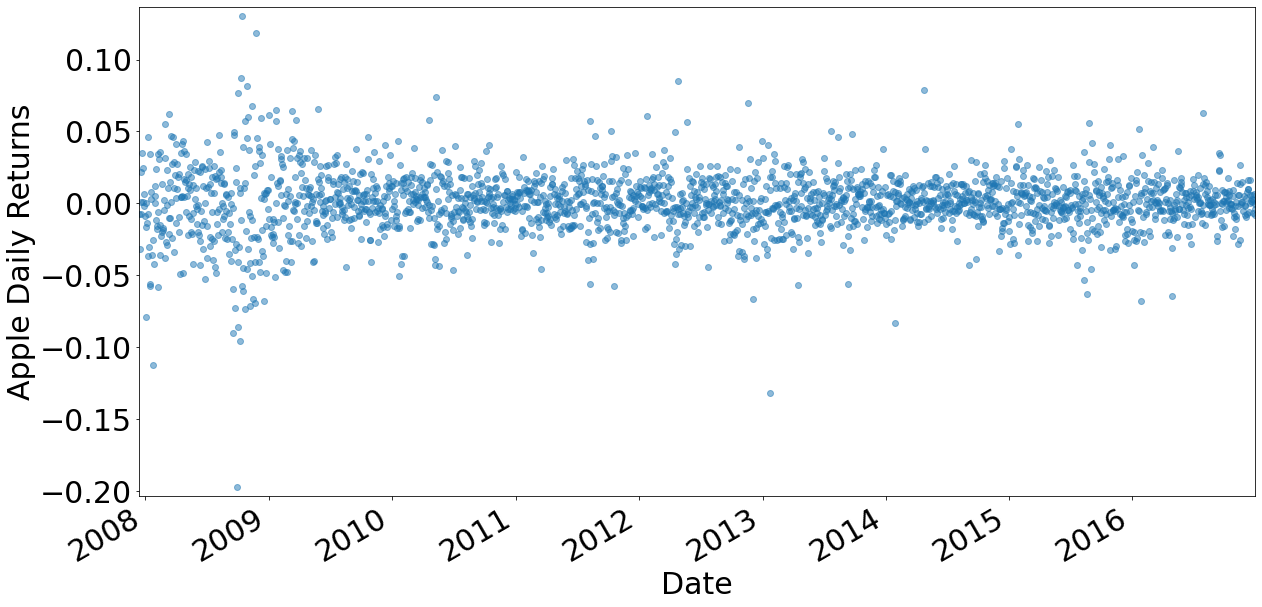

In [6]:
plt.rcParams['axes.ymargin'] = 0.02
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize = (20,10))
ret.plot(legend = False,ls = "", marker = "o", alpha = .5, ax = ax)
ax.set_ylabel("Apple Daily Returns")

In [7]:
lags = 3
regs = {"Regression":{},
       "Results":{}}
formula = "AAPL ~ "
for lag in range(1, lags + 1):
    ret["AAPL_lag" + str(lag)] = ret["AAPL"].shift(lag)
    if lag != 1:
        formula = formula + " + "
    formula = formula + "AAPL_lag" + str(lag) 
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = ret.dropna())
    regs["Results"][lag] = regs["Regression"][lag].fit()
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0$$,,,,
Intercept,0.0007,1.5837,0.1134,0.0004
AAPL_lag1,-0.0011,-0.0512,0.9592,0.0210


In [8]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0008$$,,,,
Intercept,0.0007,1.6623,0.0966,0.0004
AAPL_lag1,-0.0014,-0.0662,0.9472,0.0210
AAPL_lag2,-0.0284,-1.3564,0.1751,0.0210


In [9]:
OLS_summary(regs["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0008$$,,,,
Intercept,0.0007,1.6610,0.0968,0.0004
AAPL_lag1,-0.0015,-0.0731,0.9417,0.0210
AAPL_lag2,-0.0285,-1.3592,0.1742,0.0210
AAPL_lag3,0.0053,0.2549,0.7988,0.0210


## 11.2. The Nature of Highly Persistent Time Series

### Random Walk Hypothesis

$$y_t = y_{t-1} + e_t$$

$$ y_t = y_0 + e_1 + e_2 + ... + e_{t-1} + e_t $$

$$Var(y_t|y_0) = \sigma_e^2t$$

Data that is a random walk is a function of the value in the previous periods (as opposed to being drawn from a distribution whose mean is defined by a constant or a line. Rather, the new value is drawn from a distribution $E$ wherek $\bar{E}$ is a constant. Below, we assume $\bar{E}=0$.

In [10]:
x_range = np.linspace(0, 100, num = 101)
simulations = {}

for r in range(1000):
    e = stats.norm.rvs(0,1, size = 101)
    e[0] = 0
    simulations[r] = np.cumsum(e)
simulations = pd.DataFrame(simulations)
simulations.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.305050,-0.078478,0.177896,-0.624465,1.066640,0.545773,1.053224,-1.649005,2.215038,0.122239,...,-0.437129,-0.855400,-0.372770,-0.364858,1.044691,-1.306050,-0.814293,-0.283673,0.593972,-0.452309
2,1.045252,0.349965,-0.121297,-1.064772,2.104459,-0.899209,1.665511,-3.174521,2.246429,0.646140,...,-0.778188,-0.626667,0.774648,-1.067234,1.317203,-0.212321,-2.291590,-0.294598,1.168098,-1.113978
3,1.459179,1.025303,-1.730033,-1.603266,2.798109,-0.801655,0.744588,-2.909419,3.615411,0.309202,...,-1.063305,0.341897,1.556642,-0.047969,-1.533026,-1.086790,-1.797525,2.275222,2.681571,-2.545838
4,-0.305614,1.039355,-2.628804,-1.210998,2.105038,-0.296382,1.021894,-4.479505,2.783256,-0.143609,...,-0.874769,0.996859,1.220229,-1.689555,-1.343023,0.295385,-2.877861,1.847182,4.401937,-3.172228


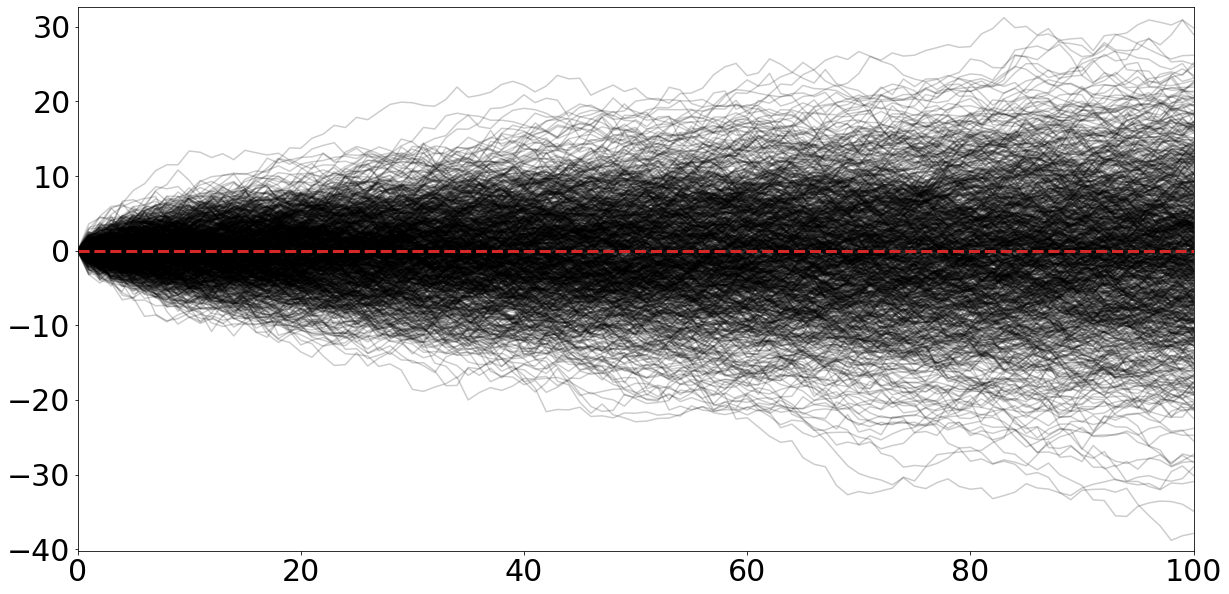

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .2, color = "k", ax = ax, legend = False)
ax.axhline(0, ls = "--", color = "C3", linewidth = 3)


If that $\bar{E} \ne 0$, the the the function is described as a random walk with drift. We describe $\bar{E}$ as $\alpha_0$.

$$y_t = \alpha_0 + y_{t-1} + e_t$$

$$ y_t = y_0 + \alpha_0t + e_1 + e_2 + ... + e_{t-1} + e_t $$

In [12]:
def monte_carlo_simulation(e_bar = 0, periods = 101, num_simulations = 100):
    x_range = np.linspace(0, periods - 1, 
                          num = periods)
    simulations = {}
    for r in range(num_simulations):
        e = stats.norm.rvs(e_bar, 1, size = periods)
        e[0] = 0
        simulations[r] = np.cumsum(e)
    simulations = pd.DataFrame(simulations)
    return simulations

e_bar = 2
periods = 200
num_simulations = 5000
simulations = monte_carlo_simulation(e_bar = e_bar, 
                                     periods = periods, 
                                     num_simulations = num_simulations)
simulations

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.057119,1.907201,0.467423,0.918667,0.862597,1.316253,1.214975,0.620671,2.129061,1.890180,...,2.137953,1.542255,2.782719,1.103037,0.476249,1.690994,2.351738,1.202088,2.628283,0.456335
2,0.794962,3.440952,2.063792,3.627348,2.102385,3.294193,2.143907,2.605095,5.965756,3.436114,...,6.192666,3.055364,5.263850,4.781090,1.577206,3.492241,6.138282,3.019151,5.172939,3.000978
3,4.583465,7.147417,3.558216,7.023579,5.662904,5.440155,1.435720,4.964192,7.940530,4.014938,...,9.055909,5.666298,8.022106,7.436245,3.869141,3.761807,8.684613,3.210845,6.363179,5.700045
4,6.825969,10.559207,5.896504,9.113288,7.108385,6.444647,4.303543,6.934063,7.503379,5.156314,...,10.076908,6.988344,8.930922,9.093167,5.627948,6.999467,10.332577,5.614970,9.701395,7.270993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,387.266030,398.785791,403.621675,404.339731,393.807528,399.098811,417.203228,374.500305,393.153140,395.023545,...,411.582029,399.071723,396.762210,363.843522,375.394106,385.823437,386.474099,361.305193,387.923733,402.065555
196,388.996233,400.119218,406.797318,408.525310,396.589356,400.863443,420.212900,375.506099,394.612072,397.340794,...,412.491871,401.579501,399.098256,364.371216,376.499064,385.745856,386.008953,362.559027,391.322859,405.693096
197,391.653796,401.639233,408.507349,410.732171,399.293746,401.430419,420.074323,378.546988,398.440122,399.944195,...,413.773915,403.437214,400.416765,367.214813,376.791756,386.636030,387.651170,362.536105,392.482026,406.853046
198,392.492946,402.098584,409.506325,412.467562,401.718554,404.207785,422.315274,380.169383,398.858071,402.122206,...,414.947983,404.474474,401.417370,369.010558,379.092594,389.417909,389.660166,365.409567,393.679668,409.572009


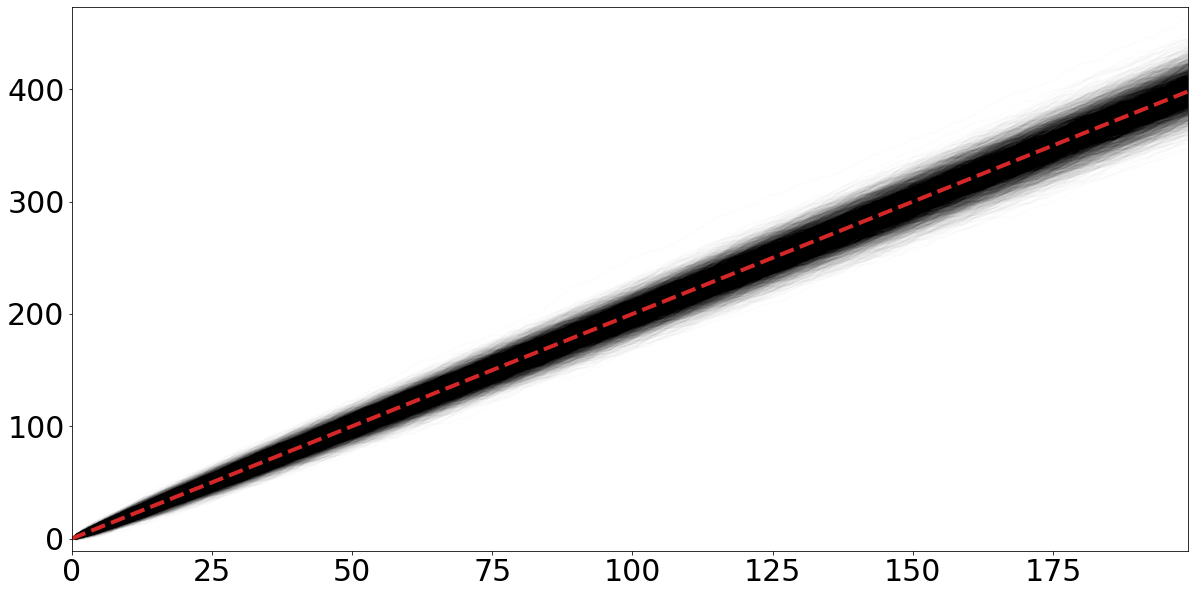

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .01, 
                      color = "k", 
                      ax = ax, 
                      legend = False)
ax.plot(np.arange(periods), np.arange(periods) * e_bar, ls = "--", color = "C3", linewidth = 4)


## 11.3. Differences of Highly Persistent Time Series


In [14]:
simulations.diff()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.057119,1.907201,0.467423,0.918667,0.862597,1.316253,1.214975,0.620671,2.129061,1.890180,...,2.137953,1.542255,2.782719,1.103037,0.476249,1.690994,2.351738,1.202088,2.628283,0.456335
2,1.852081,1.533751,1.596368,2.708681,1.239788,1.977940,0.928933,1.984424,3.836695,1.545934,...,4.054713,1.513109,2.481131,3.678053,1.100957,1.801247,3.786544,1.817063,2.544656,2.544643
3,3.788503,3.706466,1.494424,3.396231,3.560519,2.145962,-0.708188,2.359097,1.974774,0.578824,...,2.863244,2.610935,2.758257,2.655155,2.291935,0.269566,2.546330,0.191695,1.190240,2.699066
4,2.242504,3.411789,2.338288,2.089709,1.445481,1.004492,2.867823,1.969871,-0.437151,1.141375,...,1.020999,1.322045,0.908816,1.656922,1.758807,3.237660,1.647964,2.404125,3.338216,1.570948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.347901,3.707395,2.421100,2.433317,2.858057,3.815994,1.713566,1.172800,2.449144,2.057315,...,3.174404,-0.162637,2.612762,-1.001002,2.947157,1.938195,2.935216,1.604903,1.142860,1.431577
196,1.730203,1.333426,3.175643,4.185579,2.781827,1.764632,3.009672,1.005794,1.458932,2.317249,...,0.909842,2.507777,2.336047,0.527694,1.104959,-0.077581,-0.465146,1.253833,3.399126,3.627541
197,2.657563,1.520015,1.710031,2.206861,2.704390,0.566976,-0.138577,3.040889,3.828050,2.603401,...,1.282045,1.857714,1.318508,2.843597,0.292691,0.890174,1.642217,-0.022922,1.159167,1.159950
198,0.839150,0.459351,0.998976,1.735392,2.424808,2.777366,2.240951,1.622395,0.417948,2.178011,...,1.174068,1.037259,1.000605,1.795745,2.300839,2.781879,2.008997,2.873462,1.197642,2.718963


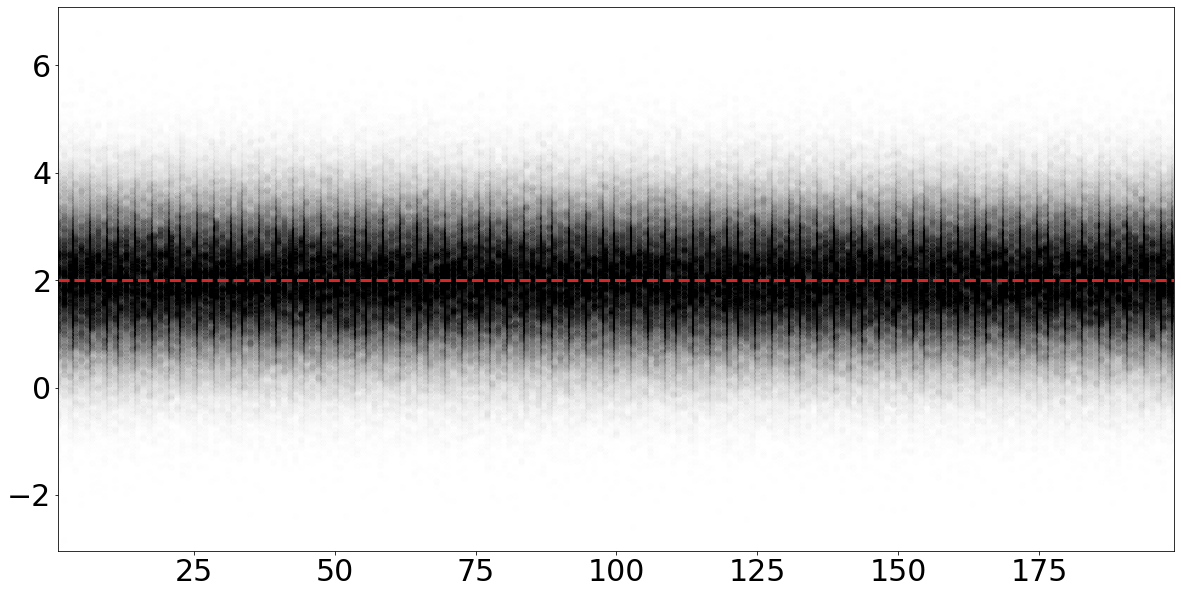

In [27]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.diff().plot.line(alpha = .002,
                             ls = " ",
                             marker = "o",
                             markersize = 6,
                             color = "k",
                      ax = ax, 
                      legend = False)
ax.axhline(e_bar, ls = "--", color = "C3", linewidth = 3)


### Example 11.6: Fertility Equation

In [16]:
fertil3 = woo.dataWoo("fertil3")
periods = len(fertil3)
# calling from pd.date_range().year includes only the year value, does not assert month and day
fertil3.index = pd.date_range(start="1913",periods = periods,freq="Y").year
fertil3 = fertil3.diff()
fertil3

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,1.900002,0.000000,1.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,-1.599998,0.000000,1.0,1.0,5.0,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1.900002,NaN,NaN,NaN,NaN,NaN
1916,-1.599998,0.000000,1.0,1.0,7.0,0.000000,0.000000,NaN,NaN,0.0,...,0.000000,NaN,NaN,NaN,-1.599998,-3.500000,NaN,NaN,NaN,1.900002
1917,-2.400002,19.270000,1.0,1.0,9.0,0.000000,0.000000,0.000000,NaN,0.0,...,0.000000,0.000000,NaN,NaN,-1.599998,0.000000,-3.500000,NaN,NaN,-1.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1.200005,-9.759995,1.0,1.0,135.0,13.949989,2.870003,-3.970001,-2.279999,0.0,...,11.079987,6.840004,-1.690002,5.850006,1.699997,3.000000,-2.300003,1.199997,2.200005,-1.300003
1981,-1.000000,-3.860001,1.0,1.0,137.0,-9.759995,13.949989,2.870003,-3.970001,0.0,...,-23.709984,11.079987,6.840004,-1.690002,1.200005,-0.499992,3.000000,-2.300003,1.199997,1.699997
1982,-0.099998,-17.269997,1.0,1.0,139.0,-3.860001,-9.759995,13.949989,2.870003,0.0,...,5.899994,-23.709984,11.079987,6.840004,-1.000000,-2.200005,-0.499992,3.000000,-2.300003,1.200005
1983,-1.500000,-9.550003,1.0,1.0,141.0,-17.269997,-3.860001,-9.759995,13.949989,0.0,...,-13.409996,5.899994,-23.709984,11.079987,-0.099998,0.900002,-2.200005,-0.499992,3.000000,-1.000000


In [17]:
lags = 2
regs = {"Regression":{},
       "Results":{}}
formula = "gfr ~ pe"
for lag in range(lags + 1):
    if lag > 0:
        fertil3["pe_lag" + str(lag)] = fertil3["pe"].shift(lag)
        formula = formula + "+ pe_lag" + str(lag)
    
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = fertil3)
    regs["Results"][lag] = regs["Regression"][lag].fit()
OLS_summary(regs["Results"][0])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0318$$,,,,
Intercept,-0.7848,-1.5632,0.1226,0.5020
pe,-0.0427,-1.5045,0.1370,0.0284


In [18]:
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0347$$,,,,
Intercept,-0.8373,-1.6362,0.1065,0.5117
pe,-0.0456,-1.5491,0.1261,0.0295
pe_lag1,0.0134,0.4542,0.6511,0.0295


In [19]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.2325$$,,,,
Intercept,-0.9637,-2.0602,0.0434,0.4678
pe,-0.0362,-1.3522,0.1810,0.0268
pe_lag1,-0.0140,-0.5070,0.6139,0.0276
pe_lag2,0.1100,4.0919,0.0001,0.0269
